Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving Iris-test.csv to Iris-test (11).csv
User uploaded file "Iris-test.csv" with 853 bytes
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_66 (Dense)            (None, 4)                 20        
                                                                 
 dense_67 (Dense)            (None, 10)                50        
                                                                 
 dense_68 (Dense)            (None, 20)                220       
                                                                 
 dense_69 (Dense)            (None, 10)                210       
                                                                 
 dense_70 (Dense)            (None, 5)                 55        
                                                                 
 dense_71 (Dense)            (None, 3)                 18        
                          

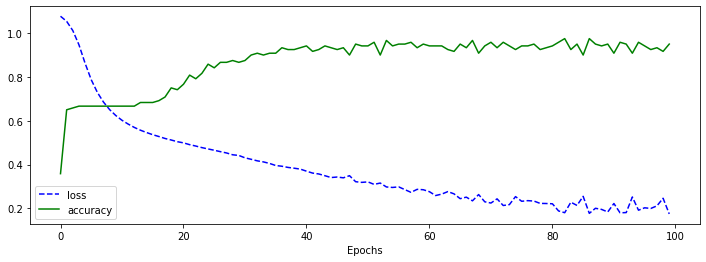

In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from google.colab import files
from google.colab import drive

#mount
drive.mount('/content/gdrive')

#load csv files in colab
colab_directory = '/content/gdrive/My Drive/TensorFlow/FlipLearningPractice/'
training_data = np.loadtxt(colab_directory + 'Iris-training.csv', delimiter = ',', skiprows = 1, unpack = True, dtype = np.float32)

#load csv files in C
uploaded = files.upload()
filename =''
for fn in uploaded.keys():
  print('User uploaded file "{name}" with {length} bytes'.format(name = fn, length = len(uploaded[fn])))
  filename = fn
da = pd.read_csv(io.StringIO(uploaded[filename].decode('utf-8')), delimiter = ',', skiprows = 1, dtype = np.float32)
da.to_numpy()
test_data = np.transpose(da)

#slice data
x_test = np.transpose(test_data[1:5])
y_test = np.transpose(test_data[5:])
x_training = np.transpose(training_data[1:5])
y_training = np.transpose(training_data[5:])

#'sigmoid'
#'tanh'
#model
model = Sequential()
model.add(Dense(input_dim = 4, units = 4, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'tanh'))
model.add(Dense(units = 20, activation = 'tanh'))
model.add(Dense(units = 10, activation = 'tanh'))
model.add(Dense(units = 5, activation = 'tanh'))
model.add(Dense(units = 3, activation = 'softmax'))

#optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.01)
#
model.compile(optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.01),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()
history = model.fit(x_training, y_training, epochs = 100, batch_size = 10)

#save as h5
model.save(colab_directory + 'my_model.h5')

#plot
plt.figure(figsize = (12, 4))
plt.subplot(1,1,1)
plt.plot(history.history['loss'], 'b--', label = 'loss')
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
from tensorflow import keras

#load h5 file
new_model = keras.models.load_model(colab_directory + 'my_model.h5')
new_model.summary()

#predict, eval
print("accuracy : %4f" %(model.evaluate(x_test, y_test)[1]))